In [6]:
import pandas as pd 
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [7]:
import datetime
from datetime import date

In [8]:
start = date(2016,1,1)
end = date.today()

In [9]:
stock_price = web.DataReader("TWTR", "google", start, end)

In [10]:
stock_price.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-14,19.35,19.97,19.33,19.64,20835473
2017-07-17,19.80,20.24,19.73,19.94,24152845
2017-07-18,19.76,19.99,19.41,19.98,15554456
2017-07-19,20.03,20.21,19.83,20.12,13469807
2017-07-20,20.18,20.88,20.18,20.53,24792686


In [11]:
ten_days = stock_price['Close'].resample('10D').ohlc()
stock_volume = stock_price['Volume'].resample('10D').sum()
# stock_volume.tail()
ten_days.tail()

,open,high,low,close
Date,,,,
2017-06-07,17.44,17.59,16.67,16.67
2017-06-17,17.06,18.50,16.91,18.29
2017-06-27,18.12,18.12,17.65,17.92
2017-07-07,18.02,19.64,18.02,19.64
2017-07-17,19.94,20.53,19.94,20.53


In [12]:
ten_days.reset_index(inplace=True)

In [13]:
ten_days.tail()

,Date,open,high,low,close
52,2017-06-07,17.44,17.59,16.67,16.67
53,2017-06-17,17.06,18.50,16.91,18.29
54,2017-06-27,18.12,18.12,17.65,17.92
55,2017-07-07,18.02,19.64,18.02,19.64
56,2017-07-17,19.94,20.53,19.94,20.53


In [14]:
ten_days["Date"] = ten_days["Date"].map(mdates.date2num)

In [15]:
ten_days["Date"].tail()

52    736487.0
53    736497.0
54    736507.0
55    736517.0
56    736527.0
Name: Date, dtype: float64

In [16]:
# https://matplotlib.org/users/gridspec.html
# creating two figures
price_fig = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
volume_fig = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=price_fig)

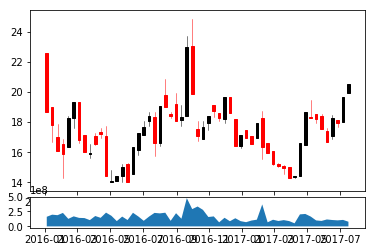

In [17]:
# plotting data
price_fig.xaxis_date()
candlestick_ohlc(price_fig, ten_days.values, width=5)
volume_fig.fill_between(stock_volume.index.map(mdates.date2num), stock_volume.values, 0)

plt.show()